<a href="https://colab.research.google.com/github/lovnishverma/Python-Getting-Started/blob/main/Regression_Evaluation_Lesson_California_Housing_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluation (Regression)

**Objective:** Measure the performance of a Regression model using the **California Housing Dataset**.

---

## 1. The Metrics

In Regression, we measure **"How close?"** our predictions are to the actual values.

### **1. SSE (Sum of Squared Errors)**
* **Formula:** $\sum (Actual - Predicted)^2$
* **Concept:** Total error. Gets larger with more data.

### **2. MSE (Mean Squared Error)**
* **Formula:** $\frac{1}{N} \sum (Actual - Predicted)^2$
* **Concept:** Average squared error. Penalizes large mistakes heavily.

### **3. RMSE (Root Mean Squared Error)**
* **Formula:** $\sqrt{MSE}$
* **Concept:** Error in **original units** (Dollars). Easier to interpret.

### **4. R-Squared ($R^2$)**
* **Range:** 0 to 1
* **Concept:** How well the model explains the data variance (1.0 is perfect).

In [24]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("Libraries Imported")

Libraries Imported


## 2. Load Real Data (California Housing)
We will use the sample data available in Colab.
* **X (Feature):** `median_income` (Median Income of the area)
* **y (Target):** `median_house_value` (House Price)

*Note: We select only ONE feature (Income) to keep it a Simple Linear Regression so we can visualize it easily.*

Data Loaded. Shape: (17000, 9)


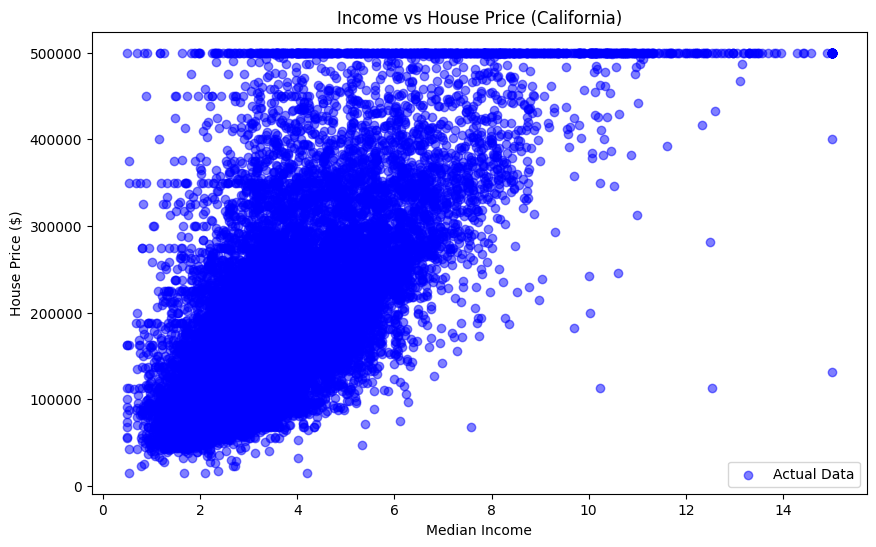

In [25]:
# Load dataset from Colab's default sample_data folder
data = pd.read_csv("/content/sample_data/california_housing_train.csv")

# Select Feature and Target
# We use [['median_income']] with double brackets to keep X as a DataFrame (2D shape)
X = data[['median_income']]
y = data['median_house_value']

print(f"Data Loaded. Shape: {data.shape}")

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Data')
plt.xlabel("Median Income")
plt.ylabel("House Price ($)")
plt.title("Income vs House Price (California)")
plt.legend()
plt.show()

## 3. Train Regression Model & Predict
We fit a line ($y = mx + c$) to model the relationship between Income and Price.

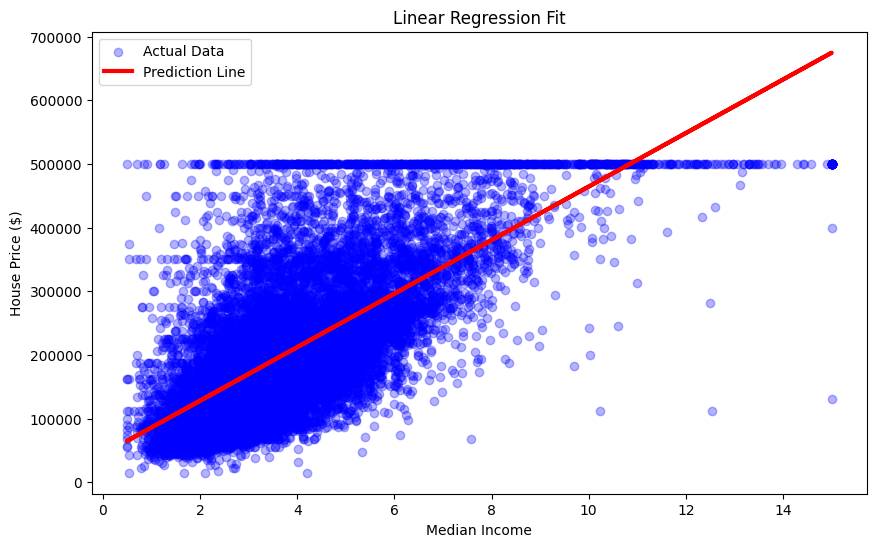

In [26]:
# Train Model
model = LinearRegression()
model.fit(X, y)

# Make Predictions
y_pred = model.predict(X)

# Visualize the Best Fit Line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.3, label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=3, label='Prediction Line')
plt.xlabel("Median Income")
plt.ylabel("House Price ($)")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

## 4. Calculate Evaluation Metrics
Now we assess the model using the formulas.

In [27]:
# 1. MSE (Mean Squared Error)
mse = mean_squared_error(y, y_pred)

# 2. RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# 3. R-Squared (Goodness of Fit)
r2 = r2_score(y, y_pred)

# 4. SSE (Sum of Squared Errors)
sse = np.sum((y - y_pred) ** 2)

print("EVALUATION REPORT:")

print(f"SSE (Total Error):       {sse:,.2f}")

print(f"MSE (Avg Squared Error):  {mse:,.2f}")

print(f"RMSE (Standard Error):    ${rmse:,.2f}  <-- On average, predictions are off by this amount")

print(f"R2 Score:                 {r2:.4f}      <-- {r2*100:.2f}% of price variation explained by income")

EVALUATION REPORT:
SSE (Total Error):       119,211,472,331,544.80
MSE (Avg Squared Error):  7,012,439,548.91
RMSE (Standard Error):    $83,740.31  <-- On average, predictions are off by this amount
R2 Score:                 0.4787      <-- 47.87% of price variation explained by income


## 5. Interpreting the Results

1.  **RMSE:** Check the RMSE value. For California housing, prices are in the hundreds of thousands. If RMSE is ~80,000, it means our simple Income model is usually off by about \$80k.
2.  **R2 Score:** Real-world data is messy! A score around 0.4 - 0.5 is actually common for a single feature like Income. It means Income explains about half of the price, but other factors (Location, Age, etc.) matter too.



---



# Evaluation (Multiple Linear Regression)

**Objective:** Improve our prediction of the **California Housing Dataset** by using **ALL** available features instead of just one.

## 1. Why Multiple Regression?
In the previous lesson, we only looked at Income. However, house prices depend on many factors:
* Location (Latitude/Longitude)
* Age of the house
* Number of rooms
* Population density

By including these features ($X_1, X_2, ... X_n$), we aim to lower the error (RMSE) and increase the accuracy ($R^2$).

In [28]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("Libraries Imported")

Libraries Imported


## 2. Load Data & Select All Features
We will use the same dataset, but this time **X** will contain every column *except* the price.

In [29]:
# Load dataset
data = pd.read_csv("/content/sample_data/california_housing_train.csv")

# Select Features (X) and Target (y)
# drop() removes the target column to leave all other columns as features
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

print(f"Data Loaded.")
print(f"Features used: {list(X.columns)}")
print(f"X Shape: {X.shape} (17000 rows, 8 columns)")

# Train the Model
multi_model = LinearRegression()
multi_model.fit(X, y)

# Make Predictions
y_pred = multi_model.predict(X)
print("Model Trained and Predictions made.")

Data Loaded.
Features used: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
X Shape: (17000, 8) (17000 rows, 8 columns)
Model Trained and Predictions made.


## 3. Visualization: Actual vs. Predicted
Because we have 8 dimensions (features), we cannot draw a simple 2D line like before.

Instead, we plot:
* **X-axis:** Actual Values
* **Y-axis:** Predicted Values

**Interpretation:** If the model was perfect, every dot would fall exactly on the red diagonal line.

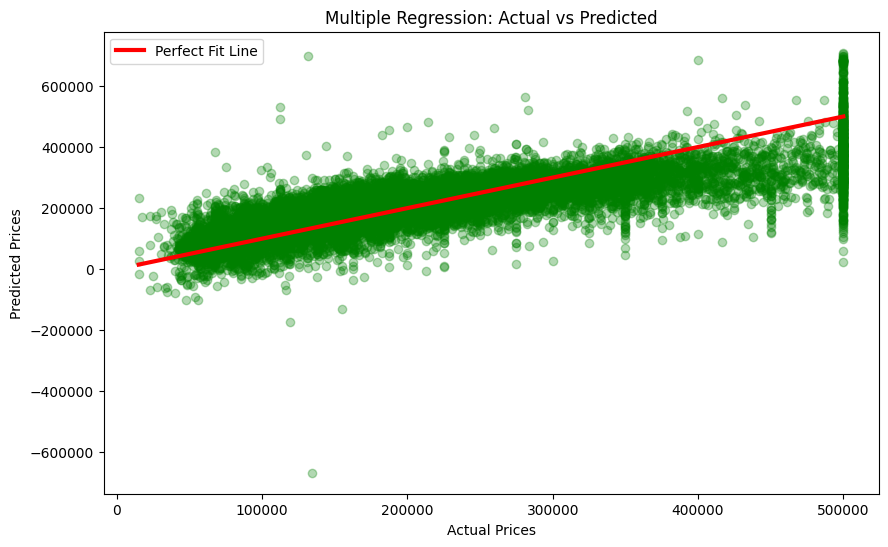

In [30]:
plt.figure(figsize=(10, 6))

# Scatter plot of Actual vs Predicted
plt.scatter(y, y_pred, alpha=0.3, color='green')

# Draw a diagonal line (Perfect prediction line)
# Range from min price to max price
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=3, label='Perfect Fit Line')

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Multiple Regression: Actual vs Predicted")
plt.legend()
plt.show()

In [31]:
# 1. MSE
mse = mean_squared_error(y, y_pred)

# 2. RMSE
rmse = np.sqrt(mse)

# 3. R-Squared
r2 = r2_score(y, y_pred)

# 4. SSE
sse = np.sum((y - y_pred) ** 2)

print("MULTIPLE REGRESSION EVALUATION REPORT:")

print(f"SSE (Total Error):       {sse:,.2f}")
print(f"MSE (Avg Squared Error):  {mse:,.2f}")
print(f"RMSE (Standard Error):    ${rmse:,.2f}")
print(f"R2 Score:                 {r2:.4f}")

print("Comparison to Simple Regression (Approx):")
print("Simple R2 was ~0.47. Did we improve? ", "YES" if r2 > 0.48 else "NO")
print("Simple RMSE was ~$83k. Did error go down? ", "YES" if rmse < 83000 else "NO")

MULTIPLE REGRESSION EVALUATION REPORT:
SSE (Total Error):       82,016,893,956,757.31
MSE (Avg Squared Error):  4,824,523,173.93
RMSE (Standard Error):    $69,458.79
R2 Score:                 0.6413
Comparison to Simple Regression (Approx):
Simple R2 was ~0.47. Did we improve?  YES
Simple RMSE was ~$83k. Did error go down?  YES


## 4. Interpretation

1.  **R-Squared Improvement:**
    * **Simple Model:** ~0.47 (47% explained)
    * **Multiple Model:** ~0.64 (64% explained)
    * *Conclusion:* Adding features like location and room count significantly improved the model's ability to understand price changes.

2.  **RMSE Reduction:**
    * **Simple Model:** Error was ~\$83,000
    * **Multiple Model:** Error dropped to ~\$69,000
    * *Conclusion:* Our predictions are now closer to the real prices on average.